<a href="https://colab.research.google.com/github/bhoomika297/Langchain-projects/blob/main/Multi_AI_agents_chatbot_with_External_Tools_With_Langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict

In [ ]:
!pip install langgraph langsmith langchain langchain-groq langchain_community

  Using cached langgraph-0.2.14-py3-none-any.whl.metadata (13 kB)
  Using cached langsmith-0.1.106-py3-none-any.whl.metadata (13 kB)
  Using cached langchain-0.2.15-py3-none-any.whl.metadata (7.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.9/394.9 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━

In [ ]:
!pip install arxiv wikipedia

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.2 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=6ccac7438c44d099a6bfd38bb23e917ec7d6f7180cab6318d2b1dac71f904ad1
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=1e63c6b9a09a60958eb977ae5d1d85a62797545d25c8dee82297689858120e7a
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built wikipedia sgmllib3k


In [ ]:
## Working with external Tools

from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun


## Arxiv and wikipedia tools
arxiv_wrapper=ArxivAPIWrapper(top_k_results=1,doc_content_chars_max=300)
arxiv_tool = ArxivQueryRun(arxiv_wrapper=arxiv_wrapper)

api_wrapper = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=300)
wiki_tool = WikipediaQueryRun(api_wrapper=api_wrapper)

In [ ]:
wiki_tool.invoke("why is hong kong famous for")

"Page: Hong Kong\nSummary: Hong Kong is a special administrative region of the People's Republic of China. With 7.4 million residents of various nationalities in a 1,104-square-kilometre (426 sq mi) territory, Hong Kong is one of the most densely populated territories in the world.\nHong Kong was estab"

In [ ]:
arxiv_tool.invoke("what is transformer")

'Published: 2023-01-03\nTitle: Digital Engineering Transformation with Trustworthy AI towards Industry 4.0: Emerging Paradigm Shifts\nAuthors: Jingwei Huang\nSummary: Digital engineering transformation is a crucial process for the engineering\nparadigm shifts in the fourth industrial revolution (4IR), and artificial\nintelligence (AI) is a critical enabling technology in digital engineering\ntransformation. This article discusses the following research questions: What\nare the fundamental changes in the 4IR? More specifically, what are the\nfundamental changes in engineering? What is digital engineering? What are the\nmain uncertainties there? What is trustworthy AI? Why is it important today?\nWhat are emerging engineering paradigm shifts in the 4IR? What is the\nrelationship between the data-intensive paradigm and digital engineering\ntransformation? What should we do for digitalization? From investigating the\npattern of industrial revolutions, this article argues that ubiquitous ma

In [ ]:
tools= [wiki_tool]

In [95]:
## LangGraph Application
from langgraph.graph.message import add_messages
class State(TypedDict):
  messages:Annotated[list,add_messages]

In [96]:
from langgraph.graph import StateGraph,START,END

In [97]:
graph_builder = StateGraph(State)

In [98]:
from langchain_groq import ChatGroq

In [99]:
from google.colab import userdata
groq_api_key = userdata.get("GROQ_API_KEY")

In [100]:
llm = ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7ac82a880fd0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7ac82aa0ecb0>, model_name='Gemma2-9b-It', groq_api_key=SecretStr('**********'))

In [101]:
llm_with_tools = llm.bind_tools(tools=tools)

In [102]:
def chatbot(state:State):

  return {"message":[llm_with_tools.invoke(state["messages"])]}

In [103]:
from langgraph.prebuilt import ToolNode, tools_condition

# graph_builder.add_node("chatbot",chatbot)
# graph_builder.add_edge(START,"chatbot")

# tool_node = ToolNode(tools=tools)
# graph_builder.add_node("tools",tool_node)

# graph_builder.add_conditional_edges("chatbot",tools_condition)

# graph_builder.add_edge("tools","chatbot")
# graph_builder.add_edge("chatbot",END)
graph_builder.add_node("chatbot",chatbot)
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START,"chatbot")

In [104]:
graph = graph_builder.compile()

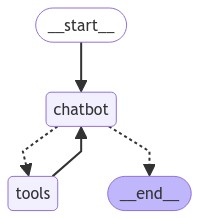

In [105]:
from IPython.display import Image,display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [106]:
user_input = "who is prime minister of India"

events = graph.stream(
    {"messages": [("user",user_input)]},stream_mode="update"
)

for event in events:
   event["messages"][-1].pretty_print()


InvalidUpdateError: Must write to at least one of ['messages']